In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from SpectralLayer import *

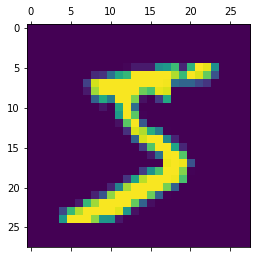

In [2]:
#data download and preprocess
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0
plt.matshow(x_train[0])
plt.show()

flat_train = np.reshape(x_train,[x_train.shape[0],28*28])
flat_test = np.reshape(x_test,[x_test.shape[0],28*28])

In [3]:
#Build a model of 3 spectral layers 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28*28,),dtype='float32'))
model.add(SpectralLayer(500,is_base_trainable=False,activation='tanh'))
model.add(SpectralLayer(200,is_base_trainable=True,activation='tanh'))
model.add(SpectralLayer(10,is_base_trainable=True,activation='softmax'))

opt = tf.keras.optimizers.Adamax(learning_rate=0.01)#about 0.05  linear and 0.03 eigvalue/0.01eigvector for the non linear
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spectral_layer (SpectralLaye (None, 500)               500       
_________________________________________________________________
spectral_layer_1 (SpectralLa (None, 200)               100200    
_________________________________________________________________
spectral_layer_2 (SpectralLa (None, 10)                2010      
Total params: 102,710
Trainable params: 102,710
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Train for some epochs
epochs=20
history = model.fit(flat_train, y_train,batch_size=5000, verbose=1, epochs=epochs)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 452us/sample - loss: 1.6085 - accuracy: 0.5578
Epoch 2/20
60000/60000 [==============================] - 24s 401us/sample - loss: 0.6836 - accuracy: 0.7924
Epoch 3/20
60000/60000 [==============================] - 24s 397us/sample - loss: 0.4273 - accuracy: 0.8767
Epoch 4/20
60000/60000 [==============================] - 24s 408us/sample - loss: 0.3441 - accuracy: 0.8991
Epoch 5/20
60000/60000 [==============================] - 24s 399us/sample - loss: 0.3014 - accuracy: 0.9126
Epoch 6/20
60000/60000 [==============================] - 24s 399us/sample - loss: 0.2714 - accuracy: 0.9213
Epoch 7/20
60000/60000 [==============================] - 24s 398us/sample - loss: 0.2459 - accuracy: 0.9290
Epoch 8/20
60000/60000 [==============================] - 24s 398us/sample - loss: 0.2237 - accuracy: 0.9359
Epoch 9/20
60000/60000 [==============================] - 24s 394us/sample - loss: 0.2041 - accuracy: 0.9

In [7]:
tested = model.evaluate(flat_test, y_test, batch_size = 100,verbose=2)

10000/1 - 4s - loss: 0.1090 - accuracy: 0.9679


Prediction:  5
Ground truth:  5


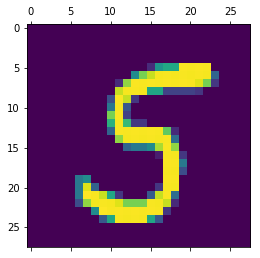

In [11]:
i = np.random.randint(10000)
predicted = model.predict(flat_test[i:i+1])
print("Prediction: ", np.argmax(predicted))
print("Ground truth: ", y_test[i])
plt.matshow(x_test[i])
plt.show()